In [1]:
#! pip install -U textblob
#! python -m textblob.download_corpora

In [2]:
import pandas as pd
import re 
import seaborn as sns
import numpy as np
from textblob import TextBlob

In [3]:
pol_subj = pd.read_csv("data/all_data_pol_sub.csv", index_col=False)
pol_subj.head()

,Unnamed: 0,date,timel,time,tweetl,mentions,replies_count,retweets_count,top_tw,likes_count,...,l,usdt,year,atom,luna,ladybug,already,gt,subj,polar
0,0,2021-04-28,16:59:39,2021-04-28 16:59:39,Checking doge coin seeing if ur rich yet 👀,[],1.0,1.0,0,8.0,...,0,0,0,0,0,0,0,0,0.750000,0.375000
1,1,2021-04-28,16:59:31,2021-04-28 16:59:31,Your so doge,[],2.0,3.0,0,7.0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
2,2,2021-04-28,16:59:24,2021-04-28 16:59:24,#DOGE Move Right Now 🐕💹🚀 Follow The best Chan...,[],31.0,18.0,1,175.0,...,0,0,0,0,0,0,0,0,0.708929,0.321429
3,3,2021-04-28,16:59:12,2021-04-28 16:59:12,@Seeker_Good 1000x for all dogseason coins $s...,[],0.0,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
4,4,2021-04-28,16:59:04,2021-04-28 16:59:04,"Oh and by the way, we've just burned over 2897...",[],74.0,179.0,1,342.0,...,0,0,0,0,0,0,0,0,0.100000,0.300000


In [4]:
all_data_token = pol_subj.drop(pol_subj.iloc[:,10:-2], axis=1)

<AxesSubplot:ylabel='Frequency'>

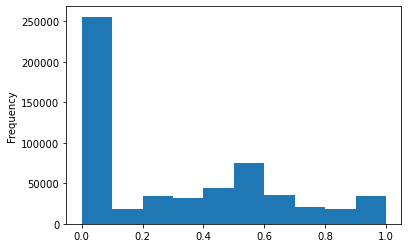

In [5]:
all_data_token.subj.plot( kind = "hist")

<AxesSubplot:ylabel='Frequency'>

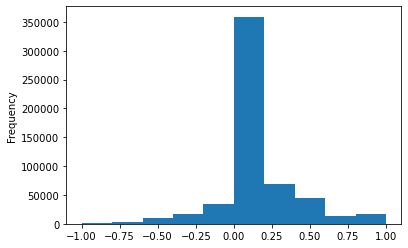

In [6]:
all_data_token.polar.plot( kind = "hist")

In [7]:
all_data_token.drop(labels = ["mentions", "tweetl", "Unnamed: 0"], axis=1, inplace=True)

In [8]:
all_data_token["top_tw"] = all_data_token["top_tw"].apply(pd.to_numeric)

In [9]:
all_data_token.head()

,date,timel,time,replies_count,retweets_count,top_tw,likes_count,subj,polar
0,2021-04-28,16:59:39,2021-04-28 16:59:39,1.0,1.0,0,8.0,0.750000,0.375000
1,2021-04-28,16:59:31,2021-04-28 16:59:31,2.0,3.0,0,7.0,0.000000,0.000000
2,2021-04-28,16:59:24,2021-04-28 16:59:24,31.0,18.0,1,175.0,0.708929,0.321429
3,2021-04-28,16:59:12,2021-04-28 16:59:12,0.0,1.0,0,1.0,0.000000,0.000000
4,2021-04-28,16:59:04,2021-04-28 16:59:04,74.0,179.0,1,342.0,0.100000,0.300000


In [17]:
#splitting to popular and unpopular tweets
top_score = []
for i in range(0, len(all_data_token["top_tw"])):
    top_score.append((all_data_token["top_tw"][i]*all_data_token["replies_count"][i]*all_data_token["likes_count"][i]*all_data_token["retweets_count"][i]*all_data_token["subj"][i]*all_data_token["polar"][i])/100)
all_data_token["top_score"]= top_score

In [18]:
all_data_token["top_score"]= top_score

In [20]:
all_data_token

,date,timel,time,replies_count,retweets_count,top_tw,likes_count,subj,polar,top_score
0,2021-04-28,16:59:39,2021-04-28 16:59:39,1.0,1.0,0,8.0,0.750000,0.375000,0.000000
1,2021-04-28,16:59:31,2021-04-28 16:59:31,2.0,3.0,0,7.0,0.000000,0.000000,0.000000
2,2021-04-28,16:59:24,2021-04-28 16:59:24,31.0,18.0,1,175.0,0.708929,0.321429,222.514955
3,2021-04-28,16:59:12,2021-04-28 16:59:12,0.0,1.0,0,1.0,0.000000,0.000000,0.000000
4,2021-04-28,16:59:04,2021-04-28 16:59:04,74.0,179.0,1,342.0,0.100000,0.300000,1359.039600
...,...,...,...,...,...,...,...,...,...,...
567521,2021-01-01,16:15:57,2021-01-01 16:15:57,0.0,4.0,0,10.0,0.000000,0.000000,0.000000
567522,2021-01-01,16:15:38,2021-01-01 16:15:38,0.0,1.0,0,1.0,0.000000,0.000000,0.000000
567523,2021-01-01,16:09:03,2021-01-01 16:09:03,1.0,1.0,0,12.0,0.000000,0.000000,0.000000
567524,2021-01-01,16:00:29,2021-01-01 16:00:29,2.0,2.0,0,22.0,0.750000,-0.250000,-0.000000


In [41]:
cols_to_mean = ['subj', 'polar']
dict_cols = {i : "sum" if i not in cols_to_mean else "mean" for i in all_data_token.columns[3: 10]}
dict_cols

{'replies_count': 'sum',
 'retweets_count': 'sum',
 'top_tw': 'sum',
 'likes_count': 'sum',
 'subj': 'mean',
 'polar': 'mean',
 'top_score': 'sum'}

In [42]:
all_data_token['time'] = pd.to_datetime(all_data_token['time'], utc=True)
all_data_token['time'] = pd.to_datetime(all_data_token['time']).dt.tz_convert('Us/Mountain')

In [43]:
#grouping by date and hour
all_data_agg = all_data_token.groupby([all_data_token['time'].dt.date, all_data_token['time'].dt.hour]).agg(dict_cols)

In [44]:
all_data_agg

replies_count  retweets_count  top_tw  likes_count      subj  \
time       time                                                                 
2020-12-31 17              0.0             8.0       0         16.0  0.408333   
           18             36.0           124.0       0        107.0  0.651512   
           19             52.0            80.0       0         69.0  0.491422   
           20             19.0            46.0       0         43.0  0.454293   
           21             12.0            30.0       0         64.0  0.416278   
...                        ...             ...     ...          ...       ...   
2021-04-28 13            207.0           963.0       7       4413.0  0.327447   
           14            643.0          1311.0       5       3182.0  0.311805   
           15            180.0           861.0       3       2090.0  0.352951   
           16           1360.0          3004.0       5      13427.0  0.316338   
           17           1886.0          5958.0      40      31404.0  0.238753   

                    polar     top_score  
time       time                          
2020-12-31 17    0.094643  0.000000e+00  
           18    0.220910  0.000000e+00  
           19    0.255571  0.000000e+00  
           20    0.242434  0.000000e+00  
           21    0.203159  0.000000e+00  
...                   ...           ...  
2021-04-28 13    0.128172  1.551894e+04  
           14    0.136751  4.765066e+04  
           15    0.143377  6.823856e+02  
           16    0.119650  4.853015e+06  
           17    0.089537  2.894701e+05  

[2831 rows x 7 columns]

In [45]:
data_prices = pd.read_csv("data/dataprices_for_lstm.csv")

In [46]:
data_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16875 entries, 0 to 16874
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     16875 non-null  object 
 1   open     16875 non-null  float64
 2   high     16875 non-null  float64
 3   low      16875 non-null  float64
 4   close    16875 non-null  float64
 5   Volume   16875 non-null  float64
 6   percent  16875 non-null  float64
 7   value    16875 non-null  float64
 8   tv       16875 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 1.2+ MB


In [47]:
data_prices['time'] = pd.to_datetime(data_prices['time'], utc=True)
data_prices['time'] = pd.to_datetime(data_prices['time']).dt.tz_convert('Us/Mountain')
data_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16875 entries, 0 to 16874
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype                      
---  ------   --------------  -----                      
 0   time     16875 non-null  datetime64[ns, US/Mountain]
 1   open     16875 non-null  float64                    
 2   high     16875 non-null  float64                    
 3   low      16875 non-null  float64                    
 4   close    16875 non-null  float64                    
 5   Volume   16875 non-null  float64                    
 6   percent  16875 non-null  float64                    
 7   value    16875 non-null  float64                    
 8   tv       16875 non-null  int64                      
dtypes: datetime64[ns, US/Mountain](1), float64(7), int64(1)
memory usage: 1.2 MB


In [48]:
data_prices = data_prices.loc[(data_prices["time"] > "2021-01-02 00:00:00") & (data_prices["time"] < "2021-04-29 01:00:00")]

In [49]:
data_prices

,time,open,high,low,close,Volume,percent,value,tv
32,2021-01-02 01:00:00-07:00,0.006921,0.007172,0.006709,0.006770,29383228.0,-2.18,-0.000151,-1
33,2021-01-02 02:00:00-07:00,0.006767,0.007038,0.006641,0.006773,41415520.0,0.09,0.000006,0
34,2021-01-02 03:00:00-07:00,0.006780,0.007179,0.006745,0.007096,31058927.0,4.66,0.000316,1
35,2021-01-02 04:00:00-07:00,0.007065,0.007421,0.007055,0.007287,31100758.0,3.14,0.000222,1
36,2021-01-02 05:00:00-07:00,0.007308,0.007315,0.006738,0.006990,57350444.0,-4.35,-0.000318,-1
...,...,...,...,...,...,...,...,...,...
2826,2021-04-28 20:00:00-06:00,0.317420,0.322030,0.314180,0.318320,22698952.2,0.28,0.000900,0
2827,2021-04-28 21:00:00-06:00,0.318320,0.325380,0.317000,0.322810,22205970.7,1.41,0.004490,1
2828,2021-04-28 22:00:00-06:00,0.322610,0.322640,0.312610,0.314410,23157805.9,-2.54,-0.008200,-1
2829,2021-04-28 23:00:00-06:00,0.314450,0.317830,0.312520,0.314060,15291654.6,-0.12,-0.000390,0


In [50]:
data_prices = data_prices.groupby([data_prices['time'].dt.date, data_prices['time'].dt.hour]).agg({"open": "mean", "high": "sum", "low": "sum", "close": "mean", "Volume": "sum"})


In [51]:
pd.DataFrame(data_prices)

open      high       low     close      Volume
time       time                                                    
2021-01-02 1     0.006921  0.007172  0.006709  0.006770  29383228.0
           2     0.006767  0.007038  0.006641  0.006773  41415520.0
           3     0.006780  0.007179  0.006745  0.007096  31058927.0
           4     0.007065  0.007421  0.007055  0.007287  31100758.0
           5     0.007308  0.007315  0.006738  0.006990  57350444.0
...                   ...       ...       ...       ...         ...
2021-04-28 20    0.317420  0.322030  0.314180  0.318320  22698952.2
           21    0.318320  0.325380  0.317000  0.322810  22205970.7
           22    0.322610  0.322640  0.312610  0.314410  23157805.9
           23    0.314450  0.317830  0.312520  0.314060  15291654.6
2021-04-29 0     0.314240  0.317220  0.312000  0.312740  16013958.7

[2799 rows x 5 columns]

In [52]:
data_prices.describe()

,open,high,low,close,Volume
count,2799.000000,2799.000000,2799.000000,2799.000000,2.799000e+03
mean,0.073376,0.075317,0.071578,0.073486,2.654948e+07
std,0.083929,0.087130,0.080891,0.084043,5.703879e+07
min,0.006767,0.007038,0.006641,0.006770,9.028900e+04
25%,0.032794,0.033759,0.031802,0.032866,3.229348e+06
50%,0.054537,0.055162,0.054140,0.054535,7.738059e+06
75%,0.060973,0.061724,0.060018,0.060980,2.447391e+07
max,0.425267,0.480000,0.404310,0.425000,9.334161e+08


In [53]:
#merging data with pricess
all_data_m = all_data_agg.merge(data_prices, how = "inner", left_index = True, right_index = True)
all_data_m.fillna(0, inplace=True)

In [54]:
all_data_m.to_csv("data/all_data_for_lstm.csv")

In [56]:
all_data_m

replies_count  retweets_count  top_tw  likes_count      subj  \
time       time                                                                 
2021-01-02 1             314.0           445.0       6       2523.0  0.271472   
           2             594.0          1092.0       9      14113.0  0.272197   
           3             641.0           917.0      13       7111.0  0.255490   
           4             620.0           978.0      13       5997.0  0.273800   
           5             272.0           642.0       8       4139.0  0.306174   
...                        ...             ...     ...          ...       ...   
2021-04-28 13            207.0           963.0       7       4413.0  0.327447   
           14            643.0          1311.0       5       3182.0  0.311805   
           15            180.0           861.0       3       2090.0  0.352951   
           16           1360.0          3004.0       5      13427.0  0.316338   
           17           1886.0          5958.0      40      31404.0  0.238753   

                    polar     top_score      open      high       low  \
time       time                                                         
2021-01-02 1     0.082867  1.843595e+01  0.006921  0.007172  0.006709   
           2     0.108878  7.314342e+02  0.006767  0.007038  0.006641   
           3     0.084638  2.701301e+02  0.006780  0.007179  0.006745   
           4     0.091864 -4.909110e+01  0.007065  0.007421  0.007055   
           5     0.128929  7.767531e+02  0.007308  0.007315  0.006738   
...                   ...           ...       ...       ...       ...   
2021-04-28 13    0.128172  1.551894e+04  0.308670  0.312000  0.303860   
           14    0.136751  4.765066e+04  0.310310  0.310760  0.301330   
           15    0.143377  6.823856e+02  0.306520  0.315320  0.304800   
           16    0.119650  4.853015e+06  0.310590  0.326530  0.308500   
           17    0.089537  2.894701e+05  0.321110  0.326890  0.316570   

                    close      Volume  
time       time                        
2021-01-02 1     0.006770  29383228.0  
           2     0.006773  41415520.0  
           3     0.007096  31058927.0  
           4     0.007287  31100758.0  
           5     0.006990  57350444.0  
...                   ...         ...  
2021-04-28 13    0.310110  15921899.2  
           14    0.306520  19680380.6  
           15    0.310570  20889588.2  
           16    0.320940  32387298.2  
           17    0.323320  33777982.1  

[2791 rows x 12 columns]